In [1]:
from river import datasets

In [26]:
dataset = datasets.TrumpApproval()
dataset

Donald Trump approval ratings.

This dataset was obtained by reshaping the data used by FiveThirtyEight for analyzing Donald
Trump's approval ratings. It contains 5 features, which are approval ratings collected by
5 polling agencies. The target is the approval rating from FiveThirtyEight's model. The goal of
this task is to see if we can reproduce FiveThirtyEight's model.

    Name  TrumpApproval                                                                            
    Task  Regression                                                                               
 Samples  1,001                                                                                    
Features  6                                                                                        
  Sparse  False                                                                                    
    Path  C:\Users\Admin\anaconda3\envs\hieu\lib\site-packages\river\datasets\trump_approval.csv.gz

In [30]:
for x, y in dataset:
    print(x)
    print(y)
    break

{'ordinal_date': 736389, 'gallup': 43.843213, 'ipsos': 46.19925042857143, 'morning_consult': 48.318749, 'rasmussen': 44.104692, 'you_gov': 43.636914000000004}
43.75505


In [47]:
from river import compose
from river import linear_model
from river import metrics
from river import preprocessing
from river import neighbors

In [85]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LinearRegression()
)
model

Pipeline (
  StandardScaler (
    with_std=True
  ),
  LinearRegression (
    optimizer=SGD (
      lr=Constant (
        learning_rate=0.01
      )
    )
    loss=Squared ()
    l2=0.
    l1=0.
    intercept_init=0.
    intercept_lr=Constant (
      learning_rate=0.01
    )
    clip_gradient=1e+12
    initializer=Zeros ()
  )
)

In [86]:
metric = metrics.MAE()
metric

MAE: 0.

In [87]:
metric_history = []
# model = linear_model.LogisticRegression()
for x, y in dataset:
    y_pred = model.predict_one(x)
    metric = metric.update(y, y_pred)
    # print(metric)
    metric_history.append(metric.get())
    model = model.learn_one(x, y)

In [88]:
metric.get()

1.3474338935927912

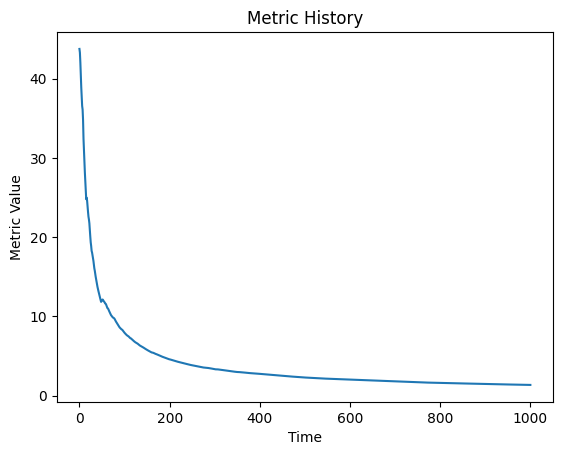

In [89]:
import matplotlib.pyplot as plt
plt.plot(range(len(metric_history)), metric_history)
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.title('Metric History')
plt.show()